In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data_read = pd.read_csv('application_temp.csv')

In [4]:
data_read.head()

,“nCPU Temperature: “55000
0,“nCPU Temperature: “55000
1,“nCPU Temperature: “55000
2,“nCPU Temperature: “55000
3,“nCPU Temperature: “55000
4,“nCPU Temperature: “56000


In [5]:
data_read[['CPU', 'Temp']] = data_read['“nCPU Temperature: “55000'].str.split(':', 1, expand= True)

In [6]:
data_read = data_read.drop('“nCPU Temperature: “55000', axis =1)

In [7]:
data_read['Variable'] = data_read['CPU'].str[2:]
data_read['Temperature'] = data_read['Temp'].str[2:]

In [8]:
data_read = data_read.drop('CPU', axis =1)

In [9]:
data_read = data_read.drop('Temp', axis =1)

In [10]:
data_read.head()

,Variable,Temperature
0,CPU Temperature,55000
1,CPU Temperature,55000
2,CPU Temperature,55000
3,CPU Temperature,55000
4,CPU Temperature,56000


In [11]:
df = pd.DataFrame(data=data_read)

In [12]:
df.dtypes

Variable       object
Temperature    object
dtype: object

In [13]:
df["Temperature"] = pd.to_numeric(df.Temperature, errors='coerce')

In [16]:
df['Temperature'] = df.apply(lambda row: (row.Temperature * 0.001), axis = 1) 

In [19]:
df.dropna(inplace=True)

In [20]:
df

,Variable,Temperature
0,CPU Temperature,55.0
1,CPU Temperature,55.0
2,CPU Temperature,55.0
3,CPU Temperature,55.0
4,CPU Temperature,56.0
...,...,...
161200,CPU Temperature,62.0
161201,CPU Temperature,62.0
161202,CPU Temperature,62.0
161203,CPU Temperature,62.0


In [21]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

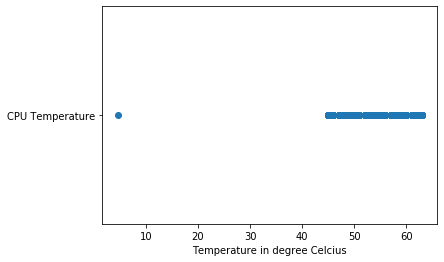

In [27]:
plt.scatter( 'Temperature','Variable', data=df)
plt.xlabel('Temperature in degree Celcius')
plt.show